In [ ]:
# Loan prediction competion at Analytics Vidhya by Sreedhara Jagatagar Sreedhara

# High Level Machine Learning Classification Project Life Cycle

- <a href='#1'>1. Domain Introduction </a>
- <a href='#2'>2. Problem statement </a>
- <a href='#3'>3. Data Source </a>
- <a href='#4'>4. Data Description </a>
- <a href='#5'>5. Identify the target variable</a>
- <a href='#6'>6. Read the data </a>
- <a href='#7'>7. Inspect the data </a> 
     - <a href='#7.1'> Check few samples</a>
     - <a href='#7.1'> Check the data types</a>
     - <a href='#7.1'> Check the initial summary</a>
- <a href='#7'>8. Data Manipulation  </a>   
     - <a href='#8.1'> Check for missing values</a>
     - <a href='#8.2'> Column string fomatting </a>
     - <a href='#8.3'> Data fomatting </a>
     - <a href='#8.4'> Imputation </a>
- <a href='#9'>9. Exploratory Data Analysis</a>
    - <a href='#9.1'> univariate analysis </a>
    - <a href='#9.2'> class ditribution in data</a>
    - <a href='#9.3'> Varibles distribution according to class</a>
    - <a href='#9.4'> Bucketing </a>
    - <a href='#9.5'> Correlation Matrix</a>
    - <a href='#9.6'> feature elimination / addition / transformation </a>
- <a href='#10'>10. Data preprocessing</a>
    - <a href='#10.1'> Encoding categorical variable </a>
    - <a href='#10.2'> Normalizing features </a>
    - <a href='#10.3'> spliting train/val/test data </a>
    - <a href='#'> feature compression </a>
- <a href='#11'>11. Model Building</a>
    - <a href='#11.1'> Baseline Model</a>
    - <a href='#11.2'> Model Selection </a>
    - <a href='#11.3'> Hyper parameter Selection </a>
- <a href='#12'>12. Model Performances</a>
    - <a href='#12.1'> model performance metrics</a>
    - <a href='#12.2'> Compare model metrics</a>
    - <a href='#12.3'> Confusion matrices for models</a>
    - <a href='#12.4'> ROC - Curves  for models</a>
    - <a href='#12.5'> Precision recall curves</a>
- <a href='#13'>13. Model Interpretation</a>
- <a href='#14'>14. Model Deployment</a>


# <a id='1'>1.Domain Introduction</a>

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan

# <a id='2'>2.Problem Statement</a>

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

# <a id='3'>3. Data Source </a>

Available at : https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
        
        

# <a id='4'>4. Data Description </a>

Variable	Description
------------------------
1. Loan_ID -------Unique Loan ID
2. Gender-------Male/ Female
3. Married ------- Applicant married (Y/N)
4. Dependents ------- Number of dependents
5. Education ------- Applicant Education (Graduate/ Under Graduate)
6. Self_Employed ------- Self employed (Y/N)
7. ApplicantIncome ------- Applicant income
8. CoapplicantIncome ------- Coapplicant income
9. LoanAmount ------- Loan amount in thousands
10. Loan_Amount_Term ------- Term of loan in months
11. Credit_History ------- credit history meets guidelines
12. Property_Area ------- Urban/ Semi Urban/ Rural
13. Loan_Status ------- Loan approved (Y/N)

# 5. Identify the target variable

**The Goal is to predict whether or not a particular customer is eligible for loan.** This is represented by the Loan_Status column in dataset. Loan Status =Yes means customer is eligible for Loan, whereas Loan status =No implies customer is not eligible for the loan.

# <a id='6'>6. Read the data </a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('train_data.csv')
df.size, df.shape
# Data: https://www.kaggle.com/blastchar/telco-customer-churn#WA_Fn-UseC_-Telco-Customer-Churn.csv

(7982, (614, 13))

# <a id='7'>7. Inspect the data </a>

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
## print the unique values in every column in dataframe

def print_unique_values_in_column(df, max_unique=30):
    for col in df:
        if len(df[col].unique()) < max_unique:
            print(df[col].name, ' : ', df[col].unique())
            print('-'*100)

            
print_unique_values_in_column(df)


Gender  :  ['Male' 'Female' nan]
----------------------------------------------------------------------------------------------------
Married  :  ['No' 'Yes' nan]
----------------------------------------------------------------------------------------------------
Dependents  :  ['0' '1' '2' '3+' nan]
----------------------------------------------------------------------------------------------------
Education  :  ['Graduate' 'Not Graduate']
----------------------------------------------------------------------------------------------------
Self_Employed  :  ['No' 'Yes' nan]
----------------------------------------------------------------------------------------------------
Loan_Amount_Term  :  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
----------------------------------------------------------------------------------------------------
Credit_History  :  [ 1.  0. nan]
----------------------------------------------------------------------------------------------------
Prope

In [7]:
# Baseline Model

#df=db_bk
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# Data Over Sampling

In [8]:
df_1=df.loc[(df.Loan_Status=='N')]
#df_1

In [9]:
#df_1=(df_1.loc[np.random.randint(0,500,500)])
df=pd.concat([df,df_1])
df.shape

(806, 13)

In [10]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.523573
N    0.476427
Name: Loan_Status, dtype: float64

In [11]:
df.loc[(df.Loan_Status=='N')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              806 non-null object
Gender               788 non-null object
Married              803 non-null object
Dependents           785 non-null object
Education            806 non-null object
Self_Employed        765 non-null object
ApplicantIncome      806 non-null int64
CoapplicantIncome    806 non-null float64
LoanAmount           773 non-null float64
Loan_Amount_Term     786 non-null float64
Credit_History       743 non-null float64
Property_Area        806 non-null object
Loan_Status          806 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 88.2+ KB


In [13]:
df.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,806,788,803,785,806,765,806,806
unique,614,2,2,4,2,2,3,2
top,LP001702,Male,Yes,0,Graduate,No,Semiurban,Y
freq,2,639,511,452,620,657,287,422


In [14]:
print_unique_values_in_column(df)

Gender  :  ['Male' 'Female' nan]
----------------------------------------------------------------------------------------------------
Married  :  ['No' 'Yes' nan]
----------------------------------------------------------------------------------------------------
Dependents  :  ['0' '1' '2' '3+' nan]
----------------------------------------------------------------------------------------------------
Education  :  ['Graduate' 'Not Graduate']
----------------------------------------------------------------------------------------------------
Self_Employed  :  ['No' 'Yes' nan]
----------------------------------------------------------------------------------------------------
Loan_Amount_Term  :  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
----------------------------------------------------------------------------------------------------
Credit_History  :  [ 1.  0. nan]
----------------------------------------------------------------------------------------------------
Prope

# <a id='8'>8. Data Manipulation </a>


In [15]:
#Check Null values and Fill the same with Maximum value it has
df['Gender'].fillna('Male',inplace=True)
df['Married'].fillna('Yes',inplace=True)
df['Dependents'].fillna('0',inplace=True)
df['Education'].fillna('Graduate',inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['Property_Area'].fillna('Semiurban',inplace=True)
df['Loan_Amount_Term'].fillna(360,inplace=True)

#Loan Amount with Mean value
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

#Bolean values  Y=1 and N=0
conditions = [df['Loan_Status'] == 'Y', df['Loan_Status'] == 'N']
values = [1.0, 0.0]

#Calucate Credit history values using both credit history and Loan status
df['Credit_History'] = np.where(df['Credit_History'].isnull(),np.select(conditions, values),df['Credit_History'])

In [16]:
# remove_punctuation from col

def filter_df(df):
    
    import string 
    def remove_punctuation(s):
        s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
        return s
    
    #filter col_names
    # df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    
    #filter col_values
    df_categorical = df.select_dtypes(include=object)
    for col in df_categorical.columns:
        print(col)
        df[col] = df[col].apply(remove_punctuation)
    return df

df = filter_df(df)

df.head()

#https://medium.com/@chaimgluck1/have-messy-text-data-clean-it-with-simple-lambda-functions-645918fcc2fc


Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,147.538163,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## <a id='8.1'>Data Manipulation </a>

In [17]:
df.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [18]:
df.isna().sum()

# df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
#len(df[df['TotalCharges'].isna()])

# <a id='9'>9. Exploratory Data Analysis </a>

In [19]:
df_categorical = df.select_dtypes(include=object)

column_categorical = df_categorical.columns
column_categorical

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
df_categorical.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [21]:
df_numerical = df.select_dtypes(include=[np.float, np.int])

column_numerical = df_numerical.columns
column_numerical

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [22]:
df_numerical.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,147.538163,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0
3,2358.0,120.000000,360.0,1.0
4,0.0,141.000000,360.0,1.0


### <a id='9.1'> Univariate Analysis</a>

In [23]:
def display_plot(df, col_to_exclude, object_mode = True):
    """ 
     This function plots the count or distribution of each column in the dataframe based on specified inputs
     @Args
       df: pandas dataframe
       col_to_exclude: specific column to exclude from the plot, used for excluded key 
       object_mode: whether to plot on object data types or not (default: True)
       
     Return
       No object returned but visualized plot will return based on specified inputs
    """
    n = 0
    this = []
    
    if object_mode:
        nrows = 2
        ncols = 4
        width = 20
        height = 20
    
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10
    
    
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
                
                
        else:
            if (df[column].dtypes != 'O'):
                this.append(column)
     
    
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
        for col in range(ncols):
            if object_mode:
                try:
                    g = sns.countplot(df[this[n]], ax=ax[row][col]) 
                except:
                    print(' ')
            else:
                try:
                    g = sns.distplot(df[this[n]], ax = ax[row][col])
                except:
                    print(' ')

            try:
                ax[row,col].set_title("Column name: {}".format(this[n]))
                ax[row, col].set_xlabel("")
                ax[row, col].set_ylabel("")
            except:
                print(' ')
            n += 1
    plt.show();
    return None


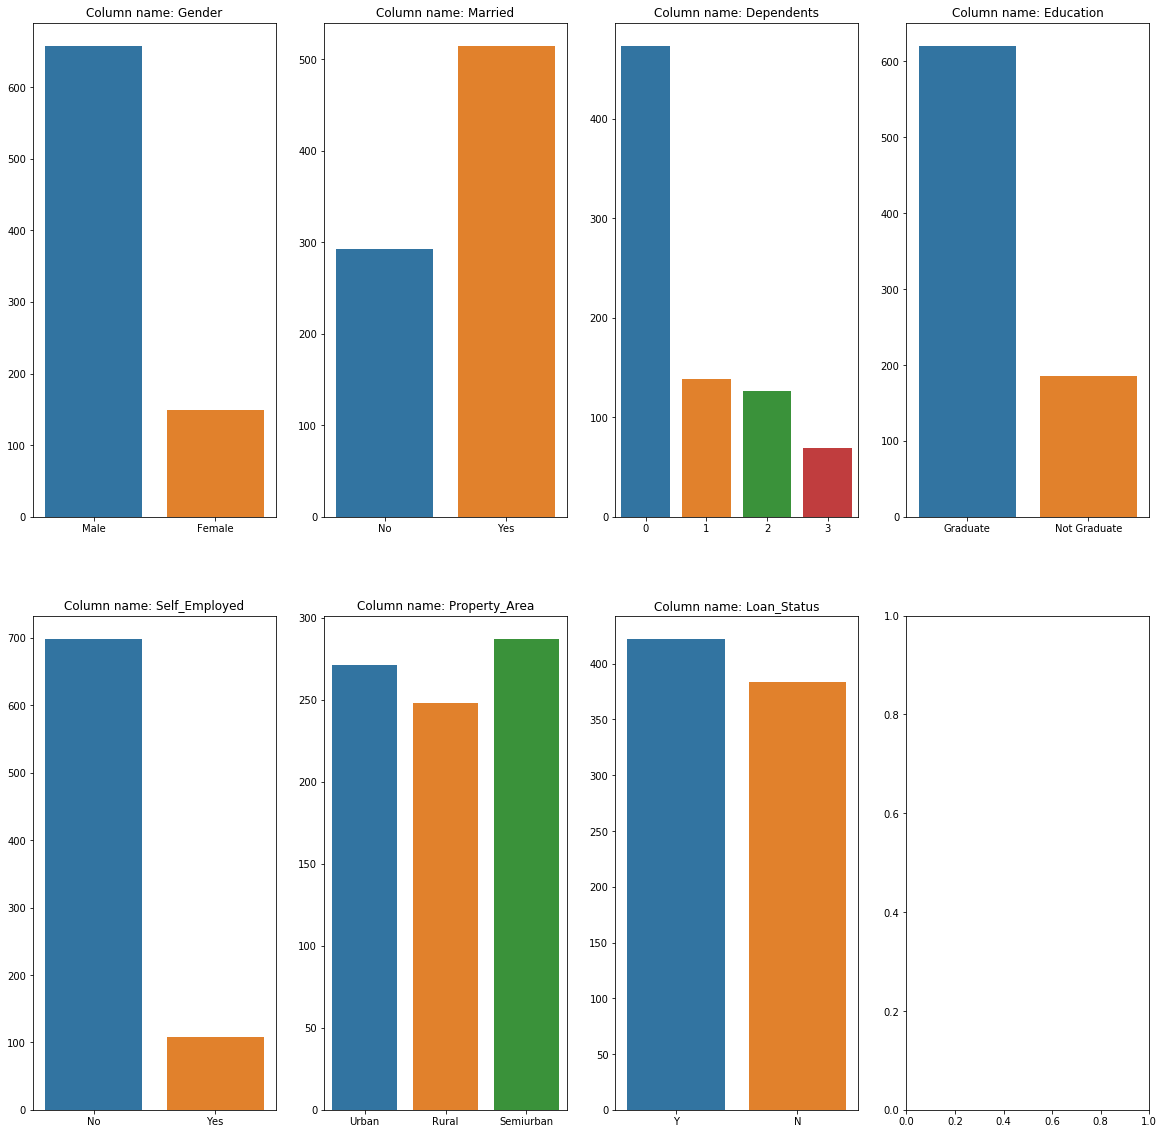

In [24]:
display_plot(df, 'Loan_ID', object_mode = True)

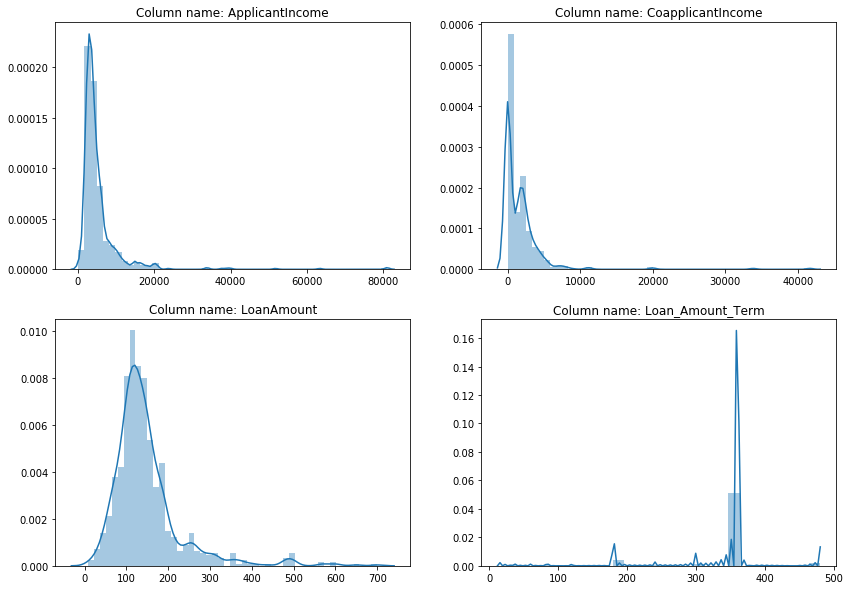

In [25]:
display_plot(df, 'Loan_ID', object_mode = False)

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,147.538163,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [27]:
def convert_no_service (df):
    col_to_transform = []
    for col in df.columns:
        if (df[col].dtype == 'O') & (col != 'Loan_ID'):
            print(col, df[   df[col].str.contains("No")][col].unique() )
            if len(df[   df[col].str.contains("No")][col].unique() ) > 1:
                col_to_transform.append(col)
    
    
    print("Total column(s) to transform: {}".format(col_to_transform))
    for col in col_to_transform:
        df.loc[df[col].str.contains("No"), col] = 'No'
        
    return df

In [28]:
df = convert_no_service(df)

Gender []
Married ['No']
Dependents []
Education ['Not Graduate']
Self_Employed ['No']
Property_Area []
Loan_Status []
Total column(s) to transform: []


In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,147.538163,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


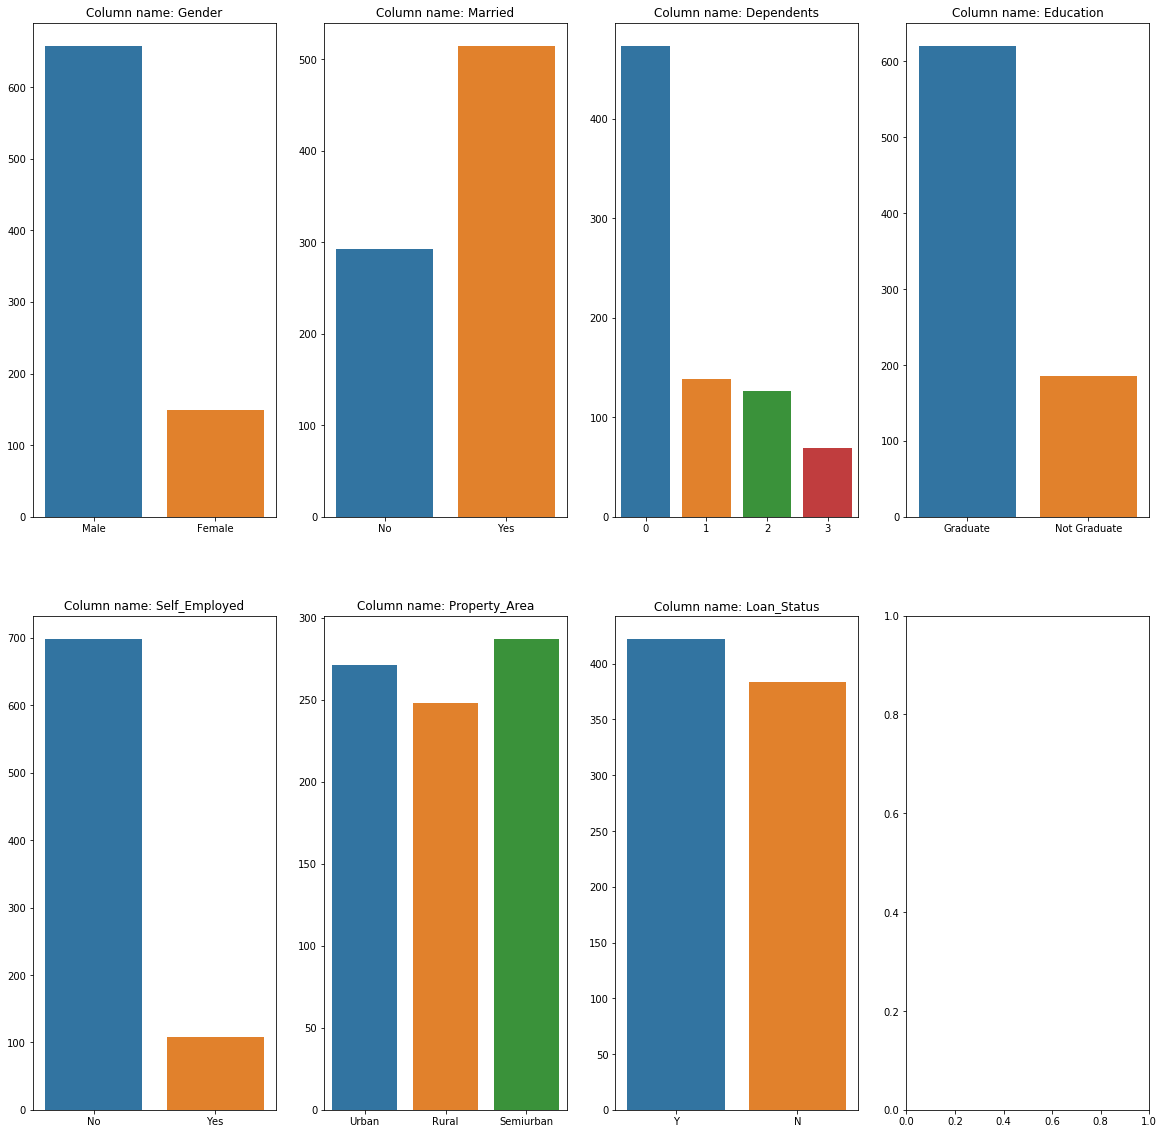

In [30]:
# Let's see the data after transformation.
display_plot(df, 'Loan_ID', object_mode = True)

Loan_Status    N    Y  All
Gender                    
Female        74   75  149
Male         310  347  657
All          384  422  806
Percent of Females  got the loan 12.214983713355048
Percent of Males got the loan 56.51465798045603


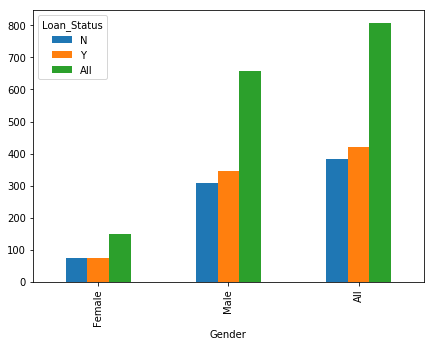

In [33]:
# Now Let's Start Comparing.
# Gender Vs Loan Status
print(pd.crosstab(df.Gender,df.Loan_Status,margins=True))
pd.crosstab(df.Gender,df.Loan_Status,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Females  got the loan {0}'.format((75/614)*100))
print('Percent of Males got the loan {0}'.format((347/614)*100))     

**We can See that Gender Does'nt Play an important Role in Predicting Our Target Variable.**

Loan_Status    N    Y  All
Married                   
No           158  134  292
Yes          226  288  514
All          384  422  806
Percent of married got the loan 21.824104234527688
Percent of not married got the loan 46.90553745928339


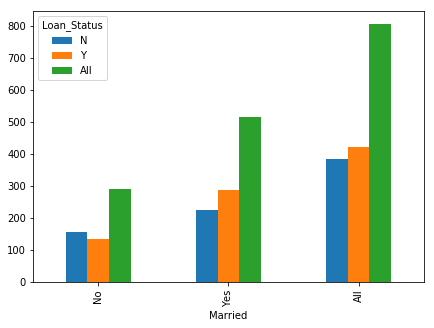

In [32]:
# Marriage status  Vs Loan status
print(pd.crosstab(df.Married,df.Loan_Status,margins=True))
pd.crosstab(df.Married,df.Loan_Status,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of married got the loan {0}'.format((134/614)*100))
print('Percent of not married got the loan {0}'.format((288/614)*100)) 


Loan_Status    N    Y  All
Dependents                
0            226  247  473
1             72   66  138
2             50   76  126
3             36   33   69
All          384  422  806
Percent of people ZERO dependancy got loan 40.22801302931596
Percent of people 1 dependancy got loan 10.749185667752444
Percent of people 2 dependancies got loan 12.37785016286645
Percent of people 3 dependancies got loan 5.374592833876222


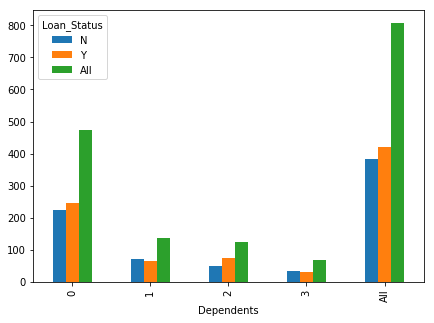

In [34]:
# Dependant Vs Loan Status
print(pd.crosstab(df.Dependents,df.Loan_Status,margins=True))
pd.crosstab(df.Dependents,df.Loan_Status,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of people ZERO dependancy got loan {0}'.format((247/614)*100))
print('Percent of people 1 dependancy got loan {0}'.format((66/614)*100)) 
print('Percent of people 2 dependancies got loan {0}'.format((76/614)*100))     
print('Percent of people 3 dependancies got loan {0}'.format((33/614)*100))     

#### Dependant has impact on the loan status. If there is no dependancies, Loan eligibility is high.

Loan_Status      N    Y  All
Property_Area               
Rural           69  110  179
Semiurban       54  179  233
Urban           69  133  202
All            192  422  614
Percent of Rural population got loan 17.91530944625407
Percent of Semiurban got loan 29.153094462540718
Percent of Urban  got loan 21.661237785016286


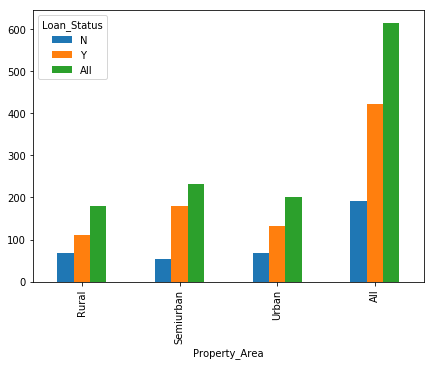

In [68]:
# Area  Vs Loan Status 
print(pd.crosstab(df.Property_Area,df.Loan_Status,margins=True))
pd.crosstab(df.Property_Area,df.Loan_Status,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Rural population got loan {0}'.format((110/614)*100))
print('Percent of Semiurban got loan {0}'.format((179/614)*100)) 
print('Percent of Urban  got loan {0}'.format((133/614)*100))

** People in Suburban get more loan eligibilities**

Loan_Status     N    Y  All
Education                  
Graduate      140  340  480
Not Graduate   52   82  134
All           192  422  614
Percent of graduate got loan 55.37459283387622
Percent of Non-graduate got loan 13.355048859934854


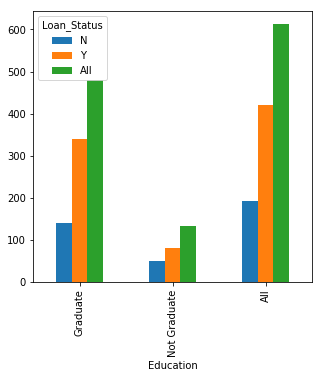

In [64]:
# Education V/S Loan Status
print(pd.crosstab(df.Education,df.Loan_Status,margins=True))
pd.crosstab(df.Education,df.Loan_Status,margins=True).plot(kind='bar',figsize=(5,5));

print('Percent of graduate got loan {0}'.format((340/614)*100))
print('Percent of Non-graduate got loan {0}'.format((82/614)*100))     

** Education impact the loan eligibilities if higher education, Higher loan eligibilities **

Loan_Status      N    Y  All
Self_Employed               
No             166  366  532
Yes             26   56   82
All            192  422  614


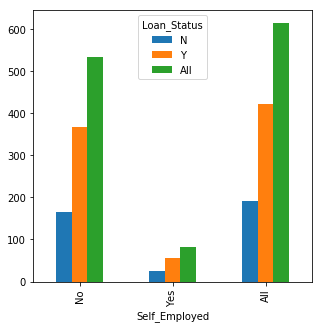

In [24]:
# Employed Vs Loan Status
print(pd.crosstab(df.Self_Employed,df.Loan_Status,margins=True))
pd.crosstab(df.Self_Employed,df.Loan_Status,margins=True).plot(kind='bar',figsize=(5,5));

** People who are employed by the company or governament have more loan eligibility**

In [35]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,806.000000,806.000000,806.000000,806.000000,806.000000
mean,5413.611663,1682.362184,147.538163,342.923077,0.755583
std,6281.233326,3330.588543,83.847156,65.309975,0.430008
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,101.250000,360.000000,1.000000
50%,3812.500000,1125.500000,130.000000,360.000000,1.000000
75%,5811.250000,2297.250000,167.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


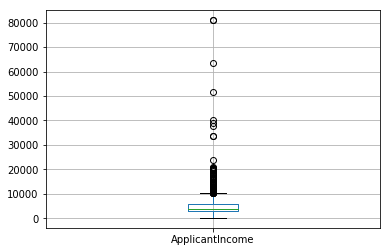

In [36]:
df.boxplot('ApplicantIncome');

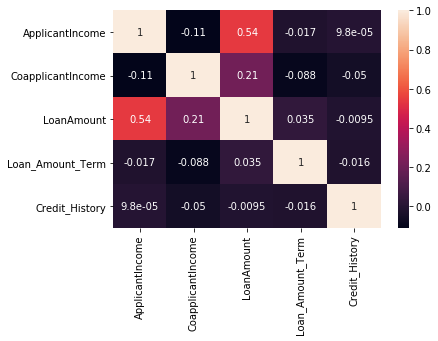

In [37]:
## correlation matrix 
# Let's Check the Correaltion Matrix in Seaborn
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values,annot=True);

## <a id='9.4'> Bucketing </a>

In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,147.538163,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# <a id='10'>10. Data preprocessing </a>

## <a id='10.1'> Encoding categorical variable </a>

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              806 non-null object
Gender               806 non-null object
Married              806 non-null object
Dependents           806 non-null object
Education            806 non-null object
Self_Employed        806 non-null object
ApplicantIncome      806 non-null int64
CoapplicantIncome    806 non-null float64
LoanAmount           806 non-null float64
Loan_Amount_Term     806 non-null float64
Credit_History       806 non-null float64
Property_Area        806 non-null object
Loan_Status          806 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 108.2+ KB


In [40]:
print_unique_values_in_column(df)

Gender  :  ['Male' 'Female']
----------------------------------------------------------------------------------------------------
Married  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
Dependents  :  ['0' '1' '2' '3']
----------------------------------------------------------------------------------------------------
Education  :  ['Graduate' 'Not Graduate']
----------------------------------------------------------------------------------------------------
Self_Employed  :  ['No' 'Yes']
----------------------------------------------------------------------------------------------------
Loan_Amount_Term  :  [360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]
----------------------------------------------------------------------------------------------------
Credit_History  :  [1. 0.]
----------------------------------------------------------------------------------------------------
Property_Area  :  ['Urban' 'Rural

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Loan id col
Id_col     = ['Loan_ID']
#Target columns
target_col = ["Loan_Status"]

print(df.nunique())
#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
# df.nunique() :Return Series with number of distinct observations over requested axis.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nunique.html 
print(cat_cols)

cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

# df.columns = cat_cols(df.nunique() < 6) + num_cols
# cat_cols = bin_cols + multi_cols

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']


In [42]:
print(num_cols)
print('-'*80)
print(bin_cols)
print('-'*80)
print(multi_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
--------------------------------------------------------------------------------
['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Status']
--------------------------------------------------------------------------------
['Dependents', 'Property_Area']


In [43]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

In [1170]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,5849,0.0,147.538163,360.0,1,1,1,0,0,0,0,0,1
1,LP001003,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,1,0,0,1,0,0
2,LP001005,1,1,0,1,3000,0.0,66.000000,360.0,1,1,1,0,0,0,0,0,1
3,LP001006,1,1,1,0,2583,2358.0,120.000000,360.0,1,1,1,0,0,0,0,0,1
4,LP001008,1,0,0,0,6000,0.0,141.000000,360.0,1,1,1,0,0,0,0,0,1


In [44]:
list(df.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

## <a id='10.2'> Normalizing features </a>

In [45]:
df.head(10)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,5849,0.0,147.538163,360.0,1,1,1,0,0,0,0,0,1
1,LP001003,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,1,0,0,1,0,0
2,LP001005,1,1,0,1,3000,0.0,66.000000,360.0,1,1,1,0,0,0,0,0,1
3,LP001006,1,1,1,0,2583,2358.0,120.000000,360.0,1,1,1,0,0,0,0,0,1
4,LP001008,1,0,0,0,6000,0.0,141.000000,360.0,1,1,1,0,0,0,0,0,1
5,LP001011,1,1,0,1,5417,4196.0,267.000000,360.0,1,1,0,0,1,0,0,0,1
6,LP001013,1,1,1,0,2333,1516.0,95.000000,360.0,1,1,1,0,0,0,0,0,1
7,LP001014,1,1,0,0,3036,2504.0,158.000000,360.0,0,0,0,0,0,1,0,1,0
8,LP001018,1,1,0,0,4006,1526.0,168.000000,360.0,1,1,0,0,1,0,0,0,1
9,LP001020,1,1,0,0,12841,10968.0,349.000000,360.0,1,0,0,1,0,0,0,1,0


In [1172]:
telcom = df

#Scaling Numerical columns
'''
Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:  z = (x - u) / s

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
'''

std = StandardScaler()

scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [46]:
telcom = df

In [1398]:
# User function
def normalize(value, min, max):  
    normalized= (value - min) / (max - min)
    return normalized


In [47]:
#normalize(telcom.ApplicantIncome.min(), telcom.ApplicantIncome.max())
import sklearn.preprocessing as pre
nrm=pre.Normalizer()
scaled = nrm.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [1411]:
#scaled.head(100)

In [48]:
#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)

In [842]:
#Check for multi-collinearity

def remove_collinear_features(x, target , threshold):
##    Objective:
#        Remove collinear features in a dataframe with a correlation coefficient
#        greater than the threshold. Removing collinear features can help a model 
#        to generalize and improves the interpretability of the model.
#
#    Inputs: 
#
#        threshold: any features with correlations greater than this value are removed
#    Output: 
#        dataframe that contains only the non-highly-collinear features
#""""

    # # Define y and x
    y = x[target] 
    x = x.drop(columns = [target])

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns)-1)
    drop_cols = [] 

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)] 
            col = item.columns
            row = item.index
            val = abs(item.values)
            #print("hellow")
            # If correlation exceeds the threshold
            if val >= threshold:
            # Print the correlated features and the correlation value
                print(col.values[0], '|', row.values[0], '|', round(val[0][0], 2))
                drop_cols.append(col.values[0])
    # Drop one of each pair of correlated columns
    drops = set(drop_cols)

    #x = x.drop(columns = drops)
    # Add the score back in to the data
    print('Hellow 2 ',drops)
    x[target] = y
    return x

In [1417]:
#sree_telecome=remove_collinear_features(telcom, 'Loan_Status' , -.5)

In [49]:
telcom.shape

(806, 14)

In [50]:
print(telcom.shape)
telcom.head(2)

(806, 14)


,Loan_ID,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,1,1,1,0,0,0,0,0,1
1,LP001003,1,1,0,0,1,0,0,1,0,0,1,0,0


In [51]:
telcom.reset_index(drop=False, inplace=True)

telcom = pd.concat([telcom, scaled], axis=1)

telcom.set_index('Loan_ID', inplace=True)

telcom.head(40)

,index,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0.997795,0.000000,0.025169,0.061413
LP001003,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0.946934,0.311581,0.026447,0.074383
LP001005,2,1,1,0,1,1,1,1,0,0,0,0,0,1,0.992640,0.000000,0.021838,0.119117
LP001006,3,1,1,1,0,1,1,1,0,0,0,0,0,1,0.734232,0.670275,0.034111,0.102332
LP001008,4,1,0,0,0,1,1,1,0,0,0,0,0,1,0.997930,0.000000,0.023451,0.059876
LP001011,5,1,1,0,1,1,1,0,0,1,0,0,0,1,0.788883,0.611067,0.038883,0.052427
LP001013,6,1,1,1,0,1,1,1,0,0,0,0,0,1,0.831109,0.540061,0.033843,0.128247
LP001014,7,1,1,0,0,0,0,0,0,0,1,0,1,0,0.767640,0.633126,0.039950,0.091024
LP001018,8,1,1,0,0,1,1,0,0,1,0,0,0,1,0.930508,0.354457,0.039023,0.083620


In [52]:
telcom.shape

(806, 18)

In [53]:
telcom.head(2)

,index,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0.997795,0.000000,0.025169,0.061413
LP001003,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0.946934,0.311581,0.026447,0.074383


In [54]:
telcom_bk=telcom


#   Check and treat outliers

In [55]:
#Check and treat outliers
telcom=telcom_bk

import numpy as np
from scipy import stats

#telcom = train_df[(np.abs(stats.zscore(train_df)) <2).all(axis=1)] 
print(telcom.shape)
telcom = telcom[(np.abs(stats.zscore(telcom)) < 3).all(axis=1)] 
print(telcom.shape)

(806, 18)
(713, 18)


In [56]:
print(telcom_bk.shape)
print(telcom.shape)

(806, 18)
(713, 18)


In [57]:
telcom.Loan_Status.value_counts(normalize=True)

1    0.537167
0    0.462833
Name: Loan_Status, dtype: float64

## <a id='10.3'> spliting train/val/test data </a>

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 

# telcom = df
target_col = telcom["Loan_Status"]

train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
# cols    = [i for i in telcom.columns if i not in  target_col]
# X_train = train[cols]
# y_train = train["Churn"]
# X_test  = test[cols]
# y_test  = test["Churn"]

X_train = train.drop(['Loan_Status'], inplace=False, axis=1)
y_train = train["Loan_Status"]

X_test  = test.drop(["Loan_Status"], inplace=False, axis=1)
y_test  = test["Loan_Status"]

In [59]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((534, 17), (534,), (179, 17), (179,))

In [60]:
features=X_train.columns
features

Index(['index', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Credit_History', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term'],
      dtype='object')

In [61]:
features=[ 'Gender', 'Married', 'Education', 'Self_Employed',
       'Credit_History', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term']
#features=['Education','Credit_History','ApplicantIncome', 'CoapplicantIncome',
#       'LoanAmount', 'Loan_Amount_Term']
features

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

In [62]:
X_train.head(), y_train.head(), X_test.head(), y_test.head()

(          index  Gender  Married  Education  Self_Employed  Credit_History  \
 Loan_ID                                                                      
 LP002683    518       1        0          0              0               1   
 LP002888    579       1        0          0              0               1   
 LP002544    485       1        1          1              0               1   
 LP001404    116       0        1          0              0               1   
 LP001047     22       1        1          1              0               0   
 
           Dependents_0  Dependents_1  Dependents_2  Dependents_3  \
 Loan_ID                                                            
 LP002683             1             0             0             0   
 LP002888             1             0             0             0   
 LP002544             0             1             0             0   
 LP001404             1             0             0             0   
 LP001047             1        

# <a id='11'>11. Model Building </a>

In [63]:
from sklearn.dummy import DummyClassifier

# Feature Selection and Encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
from sklearn import tree , linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [64]:
# validation 
from sklearn import datasets, model_selection, metrics , preprocessing

In [65]:
# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [66]:
# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

In [67]:
#utilities
import time
import io, os, sys, types, time, datetime, math, random

In [68]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    

# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

### <a id='11.1'> Baseline model with DummyClassifier</a>

In [69]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [70]:
accuracy = clf.score(X_test, y_test)  
accuracy

0.5027932960893855

In [71]:
preds = clf.predict(X_test)


# dummyistic Regression
start_time = time.time()
train_pred_dummy, test_pred_dummy, acc_dummy, acc_cv_dummy, probs_dummy = fit_ml_algo(DummyClassifier(strategy='most_frequent',random_state=0), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
dummy_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dummy)
print("Accuracy CV 10-Fold: %s" % acc_cv_dummy)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))

print (metrics.classification_report(y_train, train_pred_dummy))

print (metrics.classification_report(y_test, test_pred_dummy))


Accuracy: 50.28
Accuracy CV 10-Fold: 54.87
Running Time: 0:00:08.329922
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       241
           1       0.55      1.00      0.71       293

   micro avg       0.55      0.55      0.55       534
   macro avg       0.27      0.50      0.35       534
weighted avg       0.30      0.55      0.39       534

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.50      1.00      0.67        90

   micro avg       0.50      0.50      0.50       179
   macro avg       0.25      0.50      0.33       179
weighted avg       0.25      0.50      0.34       179



C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

## Select Candidate Algorithms

### 1. KNN
### 2. Logistic Regression
### 3. Random Forest
### 4. Naive Bayes
### 5. Stochastic Gradient Decent
### 6. Linear SVC
### 7. Decision Tree
### 8. Gradient Boosted Trees
### 9. Neural Network

In [72]:
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}



# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, # Utilize all cpu core 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV took 2.74 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.781 (std: 0.030)
Parameters: {'penalty': 'l1', 'intercept_scaling': 3.349288013923991e-11, 'class_weight': None, 'C': 1735896999166020.8}

Model with rank: 1
Mean validation score: 0.781 (std: 0.030)
Parameters: {'penalty': 'l1', 'intercept_scaling': 2.4492826375762086e-10, 'class_weight': None, 'C': 6.30492562702755e+16}

Model with rank: 3
Mean validation score: 0.779 (std: 0.032)
Parameters: {'penalty': 'l1', 'intercept_scaling': 7.879336515072576e-16, 'class_weight': None, 'C': 62.25574261351626}

Model with rank: 4
Mean validation score: 0.772 (std: 0.016)
Parameters: {'penalty': 'l1', 'intercept_scaling': 2.4885111670706397e+19, 'class_weight': 'balanced', 'C': 0.07977929405138769}

Model with rank: 5
Mean validation score: 0.766 (std: 0.024)
Parameters: {'penalty': 'l1', 'intercept_scaling': 5.2525722777232395e-17, 'class_weight': None, 'C': 1.4791662932317575}


C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\linear_model\logistic.py:1296: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Accuracy: 74.86
Accuracy CV 10-Fold: 76.78
Running Time: 0:00:00.079036
              precision    recall  f1-score   support

           0       0.89      0.56      0.68       241
           1       0.72      0.94      0.82       293

   micro avg       0.77      0.77      0.77       534
   macro avg       0.80      0.75      0.75       534
weighted avg       0.80      0.77      0.76       534

              precision    recall  f1-score   support

           0       0.92      0.54      0.68        89
           1       0.68      0.96      0.79        90

   micro avg       0.75      0.75      0.75       179
   macro avg       0.80      0.75      0.74       179
weighted avg       0.80      0.75      0.74       179



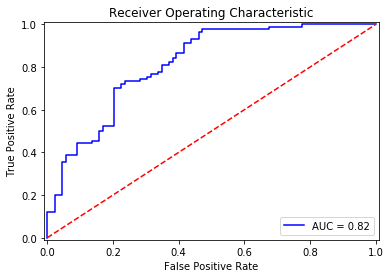

In [73]:
# Logistic Regression
start_time = time.time()
lr=LogisticRegression(n_jobs = -1)
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(lr, 
                                                                 X_train[features], 
                                                                 y_train, 
                                                                 X_test[features], 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

print (metrics.classification_report(y_train, train_pred_log))

print (metrics.classification_report(y_test, test_pred_log))

plot_roc_curve(y_test, probs_log)

Accuracy: 74.86
Accuracy CV 10-Fold: 71.35
Running Time: 0:00:00.834489
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       241
           1       0.73      0.77      0.75       293

   micro avg       0.71      0.71      0.71       534
   macro avg       0.71      0.71      0.71       534
weighted avg       0.71      0.71      0.71       534

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        89
           1       0.71      0.84      0.77        90

   micro avg       0.75      0.75      0.75       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



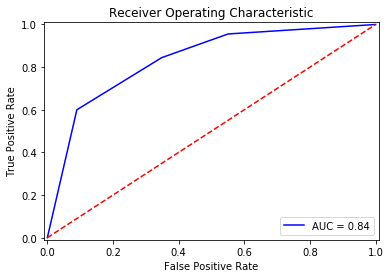

In [74]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train[features], 
                                                                                                 y_train, 
                                                                                                 X_test[features], 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

print (metrics.classification_report(y_train, train_pred_knn))

print (metrics.classification_report(y_test, test_pred_knn))

plot_roc_curve(y_test, probs_knn)

Accuracy: 73.74
Accuracy CV 10-Fold: 77.15
Running Time: 0:00:00.060040
              precision    recall  f1-score   support

           0       0.94      0.53      0.68       241
           1       0.71      0.97      0.82       293

   micro avg       0.77      0.77      0.77       534
   macro avg       0.83      0.75      0.75       534
weighted avg       0.82      0.77      0.76       534

              precision    recall  f1-score   support

           0       0.96      0.49      0.65        89
           1       0.66      0.98      0.79        90

   micro avg       0.74      0.74      0.74       179
   macro avg       0.81      0.74      0.72       179
weighted avg       0.81      0.74      0.72       179



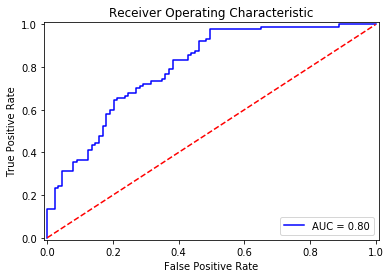

In [75]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train[features], 
                                                                                     y_train, 
                                                                                     X_test[features], 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

print (metrics.classification_report(y_train, train_pred_gaussian)) 

print (metrics.classification_report(y_test, test_pred_gaussian)) 

plot_roc_curve(y_test, probs_gau)

Accuracy: 85.47
Accuracy CV 10-Fold: 83.71
Running Time: 0:00:00.114082
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       241
           1       0.86      0.84      0.85       293

   micro avg       0.84      0.84      0.84       534
   macro avg       0.84      0.84      0.84       534
weighted avg       0.84      0.84      0.84       534

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        89
           1       0.90      0.80      0.85        90

   micro avg       0.85      0.85      0.85       179
   macro avg       0.86      0.86      0.85       179
weighted avg       0.86      0.85      0.85       179



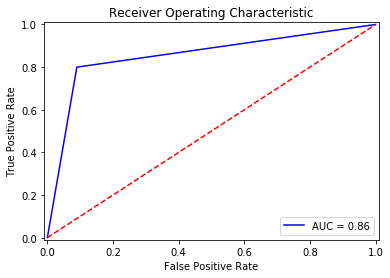

In [76]:
# Decision Tree Classifier
start_time = time.time()
dtc=DecisionTreeClassifier()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(dtc, 
                                                             X_train[features], 
                                                             y_train, 
                                                             X_test[features], 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

print (metrics.classification_report(y_train, train_pred_dt))

print (metrics.classification_report(y_test, test_pred_dt))

plot_roc_curve(y_test, probs_dt)

In [77]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 16),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=40)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train[features], y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV took 1.71 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.822 (std: 0.020)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 7}

Model with rank: 2
Mean validation score: 0.815 (std: 0.040)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 2, 'min_samples_split': 18}

Model with rank: 3
Mean validation score: 0.811 (std: 0.030)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8}

Model with rank: 4
Mean validation score: 0.807 (std: 0.023)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 9, 'min_samples_split': 17}

Model with rank: 5
Mean validation score: 0.805 (std: 0.031)
Parameters: {'bootstrap': False, 'criterion': 'entropy',

C:\Sreedhara\DataScientist\Install\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [68]:
features

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

Accuracy: 80.45
Accuracy CV 10-Fold: 81.84
Running Time: 0:00:01.325942
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       241
           1       0.78      0.93      0.85       293

   micro avg       0.82      0.82      0.82       534
   macro avg       0.83      0.81      0.81       534
weighted avg       0.83      0.82      0.81       534

              precision    recall  f1-score   support

           0       0.89      0.70      0.78        89
           1       0.75      0.91      0.82        90

   micro avg       0.80      0.80      0.80       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.80      0.80       179



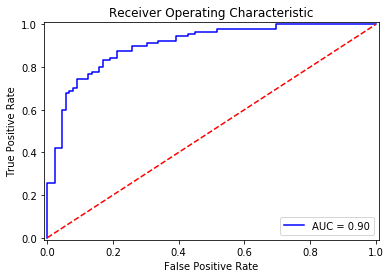

In [78]:
import numpy as seed
import random
#seed.random.seed(0)
random.seed(0)
# Random Forest Classifier

start_time = time.time()
rfc = RandomForestClassifier(n_estimators=100, 
                             min_samples_leaf=1,
                             min_samples_split=10, 
                             criterion='entropy',
                             max_depth=10,
                             max_features=6)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train[features], 
                                                             y_train, 
                                                             X_test[features], 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

print (metrics.classification_report(y_train, train_pred_rf)) 

print (metrics.classification_report(y_test, test_pred_rf))

plot_roc_curve(y_test, probs_rf)

Accuracy: 82.12
Accuracy CV 10-Fold: 84.64
Running Time: 0:00:00.719513
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       241
           1       0.81      0.94      0.87       293

   micro avg       0.85      0.85      0.85       534
   macro avg       0.86      0.84      0.84       534
weighted avg       0.85      0.85      0.84       534

              precision    recall  f1-score   support

           0       0.93      0.70      0.79        89
           1       0.76      0.94      0.84        90

   micro avg       0.82      0.82      0.82       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.82      0.82       179



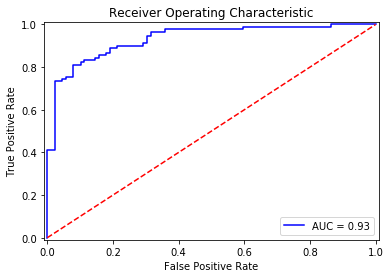

In [79]:
# Gradient Boosting Trees
start_time = time.time()
gbc=GradientBoostingClassifier()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(gbc, 
                                                                 X_train[features], 
                                                                 y_train, 
                                                                 X_test[features], 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

print (metrics.classification_report(y_train, train_pred_gbt)) 

print (metrics.classification_report(y_test, test_pred_gbt))

plot_roc_curve(y_test, probs_gbt)

In [80]:
import numpy as seed
import random
#seed.random.seed(0)
random.seed(0)

def xgb_f1(y, t):
    #
    # Function to evaluate the prediction based on F1 score, this will be used as evaluation metric when training xgboost model
    # Args:
    #   y: label
    #   t: predicted
    #
    # Return:
    #   f1: F1 score of the actual and predicted
    #
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y]   # change the prob to class output
    return 'f1', f1_score(t, y_bin)

best_xgb = XGBClassifier(objective = 'binary:logistic',
                         colsample_bylevel = 0.9, #8
                         colsample_bytree = 0.9, #7
                         gamma = .9, #1
                         alpha=.9, #new added
                         #lambda=.5, # new added
                         learning_rate = 0.05,
                         max_delta_step = 3,
                         max_depth = 7, #4
                         min_child_weight = 1, #2
                         n_estimators = 1000,
                         reg_lambda = 5, #10
                         scale_pos_weight = 1.9, #1.5
                         subsample = 0.8,
                         silent = False,
                         n_jobs = 4,
                         seed=0 #new
                        )

xgbst = best_xgb.fit(X_train[features], y_train, eval_metric = xgb_f1, eval_set = [(X_train[features], y_train), (X_test[features], y_test)], 
             early_stopping_rounds = 10)

[12:04:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=4
[0]	validation_0-error:0.194757	validation_1-error:0.27933	validation_0-f1:0.846608	validation_1-f1:0.770642
Multiple eval metrics have been passed: 'validation_1-f1' will be used for early stopping.

Will train until validation_1-f1 hasn't improved in 10 rounds.
[12:04:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=7
[1]	validation_0-error:0.196629	validation_1-error:0.27933	validation_0-f1:0.845815	validation_1-f1:0.770642
[12:04:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-error:0.192884	validation_1-error:0.273743	validation_0-f1:0.848306	validation_1-f1:0.776256
[12:04:54] C:\Users\Administrator\Desktop\xgboost\src\tree\update

In [81]:
features

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

In [82]:
train_pred_xgbst, test_pred_xgbst, acc_xgbst, acc_cv_xgbst, probs_xgbst = fit_ml_algo(xgbst, 
                                                             X_train[features], 
                                                             y_train, 
                                                             X_test[features], 
                                                             10)

[12:05:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 4 pruned nodes, max_depth=4
[12:05:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 4 pruned nodes, max_depth=7
[12:05:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=6
[12:05:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 2 pruned nodes, max_depth=4
[12:05:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[12:05:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 12 pruned nodes, max_depth=7
[12:05:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 24 pruned nodes, max_depth=5
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 28 pruned nodes, max_depth=6
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 24 pruned nodes, max_depth=6
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 34 pruned nodes, max_depth=6
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 26 pruned nodes, max_depth=5
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 32 pruned nodes, max_depth=6
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 28 pruned nodes, max_depth=7
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 26 pruned nodes, max_depth=7
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 24 pruned nodes, max_depth=7
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 28 pruned nodes, max_depth=5
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 30 pruned nodes, max_depth=7
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prun

[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 34 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 30 pruned nodes, max_depth=4
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 30 pruned nodes, max_depth=4
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 38 pruned nodes, max_depth=4
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 34 pruned nodes, max_depth=1
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 38 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 30 pruned nodes, max_depth=2
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 44 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 32 pruned nodes, max_depth=2
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 32 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 34 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 32 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 30 pruned nodes, max_depth=4
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 36 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 38 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 34 pruned nodes, max_depth=2
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 14 pruned nodes, max_depth=5
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 48 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[12:05:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[12:05:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 40 pruned nodes, max_depth=0
[12:05:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[12:05:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 38 pruned nodes, max_depth=0
[12:05:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 42 pruned nodes, max_depth=0
[12:05:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 26 pruned nodes, max_depth=6
[12:05:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 28 pruned nodes, max_depth=5
[12:05:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

In [83]:
acc_xgbst, acc_cv_xgbst,acc_cv_xgbst, probs_xgbst

(72.07, 84.64, 84.64, 'Not Available')

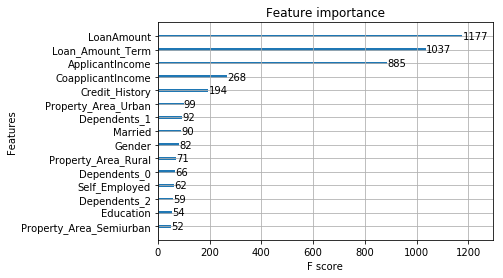

In [84]:
import xgboost as xgb
xgb.plot_importance(xgbst, max_num_features = 30)
plt.show();

In [85]:
test_pred_xgbst, acc_xgbst, acc_cv_xgbst

(array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 1]), 72.07, 84.64)

In [86]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape


((534, 17), (534,), (179, 17), (179,))

In [87]:
print(y_test.values)
print(np.argmax(y_test.values))

[0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0
 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0
 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1]
1


# Using Neural Network

In [88]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM
from keras.optimizers import SGD,Adam

lstm_out = 200
batch_size = 32

model_nn = Sequential()

model_nn.add(Dense(64,input_shape=(16,),activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(32,activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(16,activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(8,activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(4,activation='relu'))
#model_nn.add(Dropout(0.6))
model_nn.add(Dense(2,activation='softmax'))

model_nn.compile(SGD(lr=0.1),'sparse_categorical_crossentropy',metrics=['accuracy'])

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model_nn.compile(loss='categorical_crossentropy',
#              optimizer=sgd,
#              metrics=['accuracy'])

model_nn.summary()


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1088      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
__________

In [89]:
import numpy as seed
import random
#seed.random.seed(0)
random.seed(0)

In [90]:
#fitting the model and predicting 

model_nn.fit(X_train[features],y_train,epochs=250)
y_pred = model_nn.predict(X_test[features])
y_pred_prob=model_nn.predict_proba(X_test[features])

y_test_class = y_test.values# np.argmax(y_test.values)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/250
534/534 [==============================] - 1s 949us/step - loss: 0.6959 - acc: 0.5150
Epoch 2/250
534/534 [==============================] - 0s 56us/step - loss: 0.6918 - acc: 0.5449
Epoch 3/250
534/534 [==============================] - 0s 54us/step - loss: 0.6898 - acc: 0.5468
Epoch 4/250
534/534 [==============================] - 0s 51us/step - loss: 0.6908 - acc: 0.5487
Epoch 5/250
534/534 [==============================] - 0s 51us/step - loss: 0.6881 - acc: 0.5487
Epoch 6/250
534/534 [==============================] - 0s 60us/step - loss: 0.6895 - acc: 0.5449
Epoch 7/250
534/534 [==============================] - 0s 71us/step - loss: 0.6887 - acc: 0.5506
Epoch 8/250
534/534 [==============================] - 0s 62us/step - loss: 0.6881 - acc: 0.5562
Epoch 9/250
534/534 [==============================] - 0s 69us/step - loss: 0.6875 - acc: 0.5487
Epoch 10/250
534/534 [==============================] - 0s 52us/step - loss: 0.6873 - acc: 0.5524
Epoch 11/250
534/534 [======

534/534 [==============================] - 0s 54us/step - loss: 0.5218 - acc: 0.7566
Epoch 85/250
534/534 [==============================] - 0s 54us/step - loss: 0.5064 - acc: 0.7509
Epoch 86/250
534/534 [==============================] - 0s 52us/step - loss: 0.5380 - acc: 0.7453
Epoch 87/250
534/534 [==============================] - 0s 56us/step - loss: 0.5409 - acc: 0.7434
Epoch 88/250
534/534 [==============================] - 0s 54us/step - loss: 0.5013 - acc: 0.7547
Epoch 89/250
534/534 [==============================] - 0s 66us/step - loss: 0.5021 - acc: 0.7603
Epoch 90/250
534/534 [==============================] - 0s 56us/step - loss: 0.4846 - acc: 0.7622
Epoch 91/250
534/534 [==============================] - 0s 58us/step - loss: 0.5182 - acc: 0.7491
Epoch 92/250
534/534 [==============================] - 0s 79us/step - loss: 0.5309 - acc: 0.7491
Epoch 93/250
534/534 [==============================] - 0s 56us/step - loss: 0.4853 - acc: 0.7678
Epoch 94/250
534/534 [===========

534/534 [==============================] - 0s 52us/step - loss: 0.4820 - acc: 0.7678
Epoch 167/250
534/534 [==============================] - 0s 60us/step - loss: 0.4775 - acc: 0.7734
Epoch 168/250
534/534 [==============================] - 0s 67us/step - loss: 0.4679 - acc: 0.7772
Epoch 169/250
534/534 [==============================] - 0s 71us/step - loss: 0.4868 - acc: 0.7659
Epoch 170/250
534/534 [==============================] - 0s 64us/step - loss: 0.4787 - acc: 0.7659
Epoch 171/250
534/534 [==============================] - 0s 64us/step - loss: 0.4591 - acc: 0.7846
Epoch 172/250
534/534 [==============================] - 0s 62us/step - loss: 0.4680 - acc: 0.7734
Epoch 173/250
534/534 [==============================] - 0s 60us/step - loss: 0.4841 - acc: 0.7584
Epoch 174/250
534/534 [==============================] - 0s 66us/step - loss: 0.4816 - acc: 0.7790
Epoch 175/250
534/534 [==============================] - 0s 60us/step - loss: 0.4794 - acc: 0.7640
Epoch 176/250
534/534 [=

534/534 [==============================] - 0s 60us/step - loss: 0.4683 - acc: 0.7828
Epoch 249/250
534/534 [==============================] - 0s 56us/step - loss: 0.4570 - acc: 0.7772
Epoch 250/250
534/534 [==============================] - 0s 56us/step - loss: 0.4566 - acc: 0.7865


In [1230]:
#print(y_pred)
#print(y_test_class) ##y_test_class
#print(y_pred_prob)

In [91]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))
acc_nn = round(metrics.accuracy_score(y_test_class,y_pred_class) * 100, 2)
print('Accuracy NN',acc_nn)

              precision    recall  f1-score   support

           0       0.96      0.48      0.64        89
           1       0.66      0.98      0.79        90

   micro avg       0.73      0.73      0.73       179
   macro avg       0.81      0.73      0.71       179
weighted avg       0.81      0.73      0.71       179

[[43 46]
 [ 2 88]]
Accuracy NN 73.18


## <a id='' > Compare all models </a>

In [92]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
               
              'Decision Tree', 
              'Gradient Boosting Trees',
             'Neural network'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_dt,
        acc_gbt,
        acc_nn
        
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,85.47
5,Gradient Boosting Trees,82.12
2,Random Forest,80.45
0,KNN,74.86
1,Logistic Regression,74.86
3,Naive Bayes,73.74
6,Neural network,73.18


In [93]:
#print(y_pred_prob)
nn=[]
for i in range(0,len(y_pred_prob)):
    nn.append(y_pred_prob[i][1])

In [94]:

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees',
    'Neural network'
    
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt,
    nn
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'orange'
]

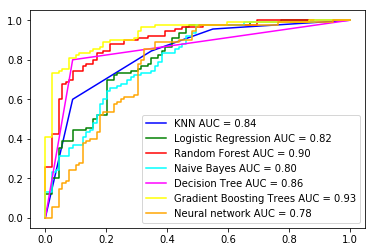

In [96]:
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

## 13.  Interpretation 

Make Conclusions from the above graph and Probability scores from the test dataset :

1. Above graph shows  Random Forest and Gradient Boosting are doing good.
2. Below are most important feaure which impacts on customer Loan eligibilitis.
    1. Loan Amount
    2. Applicant Income
    3. Co-Applicant Income
    4. Credit History

# 14. Module Deployement

# Pickle package can be used to save and deploye above high performed module.
    pickle.dump can be used to save module to disk
    picklle.load can be used to read module from disk

In [97]:
# to store Random Forest module as it perfomrms better

import pickle

file_Name = "RF"
# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object a to the
# file named 'testfile'
pickle.dump(rfc,fileObject)  
fileObject.close()

# Now predict for test data and upload result at Analytical Vidhya

###  Prepare Data for Test score

In [99]:
#Prepare Data for Test score
df_test = pd.read_csv('test_data.csv')
df_test.size, df_test.shape

(4404, (367, 12))

In [100]:
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [101]:
print_unique_values_in_column(df_test)

Gender  :  ['Male' 'Female' nan]
----------------------------------------------------------------------------------------------------
Married  :  ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents  :  ['0' '1' '2' '3+' nan]
----------------------------------------------------------------------------------------------------
Education  :  ['Graduate' 'Not Graduate']
----------------------------------------------------------------------------------------------------
Self_Employed  :  ['No' 'Yes' nan]
----------------------------------------------------------------------------------------------------
Loan_Amount_Term  :  [360. 240. 180.  nan  60. 480.  84.  12. 300. 350.  36. 120.   6.]
----------------------------------------------------------------------------------------------------
Credit_History  :  [ 1. nan  0.]
----------------------------------------------------------------------------------------------------

In [102]:
#Check Null values and Fill the same with Maximum value it has
df_test['Gender'].fillna('Male',inplace=True)
df_test['Married'].fillna('Yes',inplace=True)
df_test['Dependents'].fillna('0',inplace=True)
df_test['Education'].fillna('Graduate',inplace=True)
df_test['Self_Employed'].fillna('No',inplace=True)
df_test['Property_Area'].fillna('Semiurban',inplace=True)
df_test['Loan_Amount_Term'].fillna(360,inplace=True)

#Loan Amount with Mean value
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace=True)

#Bolean values  Y=1 and N=0
#conditions = [df_test['Loan_Status'] == 'Y', df_test['Loan_Status'] == 'N']
#values = [1.0, 0.0]

#Calucate Credit history values using both credit history and Loan status
#df_test['Credit_History'] = np.where(df_test['Credit_History'].isnull(),np.select(conditions, values),df_test['Credit_History'])
df_test['Credit_History'].fillna(1.0,inplace=True)

In [103]:
#remove functiona
df_test = filter_df(df_test)

df_test.head()

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [104]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['Loan_ID']
#Target columns
target_col = ["Loan_Status"]

print(df_test.nunique())
#categorical columns
cat_cols   = df_test.nunique()[df_test.nunique() < 6].keys().tolist()
# df.nunique() :Return Series with number of distinct observations over requested axis.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nunique.html 
print(cat_cols)

cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df_test.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = df_test.nunique()[df_test.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           145
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


In [105]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df_test[i] = le.fit_transform(df_test[i])
    
#Duplicating columns for multi value columns
df_test = pd.get_dummies(data = df_test,columns = multi_cols )

In [300]:
df_test.head(2)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,1,1,0,0,5720,0,110.0,360.0,1,1,0,0,0,0,0,1
1,LP001022,1,1,0,0,3076,1500,126.0,360.0,1,0,1,0,0,0,0,1


In [108]:
""""df_test_norm = df_test

#Scaling Numerical columns
'''
Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:  z = (x - u) / s

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
'''

std = StandardScaler()

scaled = std.fit_transform(df_test_norm[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)
scaled.head(2)
"""

'"df_test_norm = df_test\n\n#Scaling Numerical columns\n\'\'\'\nStandardize features by removing the mean and scaling to unit variance\n\nThe standard score of a sample x is calculated as:  z = (x - u) / s\n\nhttps://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html\n\'\'\'\n\nstd = StandardScaler()\n\nscaled = std.fit_transform(df_test_norm[num_cols])\nscaled = pd.DataFrame(scaled,columns=num_cols)\nscaled.head(2)\n'

In [109]:
#normalize(telcom.ApplicantIncome.min(), telcom.ApplicantIncome.max())
import sklearn.preprocessing as pre
nrm=pre.Normalizer()

df_test_norm = df_test

scaled = nrm.fit_transform(df_test_norm[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)
scaled.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.997842,0.000000,0.019189,0.062801
1,0.893294,0.435611,0.036591,0.104547


In [110]:
#dropping original values merging scaled values for numerical columns
df_telcom_og = df_test_norm.copy()
df_test_s = df_test_norm.drop(columns = num_cols,axis = 1)

In [111]:
df_test_s.reset_index(drop=False, inplace=True)

df_test_s = pd.concat([df_test_s, scaled], axis=1)

df_test_s.set_index('Loan_ID', inplace=True)

df_test_s.head()

,index,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_ID,,,,,,,,,,,,,,,,,
LP001015,0,1,1,0,0,1,1,0,0,0,0,0,1,0.997842,0.000000,0.019189,0.062801
LP001022,1,1,1,0,0,1,0,1,0,0,0,0,1,0.893294,0.435611,0.036591,0.104547
LP001031,2,1,1,0,0,1,0,0,1,0,0,0,1,0.938021,0.337688,0.039022,0.067538
LP001035,3,1,1,0,0,1,0,0,1,0,0,0,1,0.672777,0.732005,0.028751,0.103504
LP001051,4,1,0,1,0,1,1,0,0,0,0,0,1,0.993738,0.000000,0.023660,0.109202


In [706]:
#df_test_s[features]

# Random Forest

In [112]:
#Now predict the loan approval using cleaned test_set
df_test_s['Approval_Status_Predicted']=rfc.predict(df_test_s[features])
df_test_s['Loan_Status']=df_test_s.Approval_Status_Predicted.map({1:'Y',0:'N'})
#fOR csv
test_set_final_csv=df_test_s[['Loan_Status']]
test_set_final_csv_full=df_test_s
#For writting into CSV
test_set_final_csv.to_csv('Sreedhara_Submission_RF_Mar08.csv')
test_set_final_csv_full.to_csv('Sreedhara_validate_RF_Mar08.csv')

#### 79.16 %

# Neural Network

In [1488]:
#Now predict the loan approval using cleaned test_set
df_test_s['Approval_Status_Predicted']=np.argmax(model_nn.predict(df_test_s[features]),axis=1)
df_test_s['Loan_Status']=df_test_s.Approval_Status_Predicted.map({1:'Y',0:'N'})
#df_test_s['Loan_Status']=df_test_s['Approval_Status_Predicted']#np.argmax(df_test_s.Approval_Status_Predicted.values)
#fOR csv
test_set_final_csv=df_test_s[['Loan_Status']]
test_set_final_csv_full=df_test_s
#For writting into CSV
test_set_final_csv.to_csv('Sreedhara_Submission_NN_Mar08.csv')
test_set_final_csv_full.to_csv('Sreedhara_validate_NN_Mar08.csv')

77.77%

# XG Boost

In [114]:
#Now predict the loan approval using cleaned test_set
df_test_s['Approval_Status_Predicted']=xgbst.predict(df_test_s[features])
df_test_s['Loan_Status']=df_test_s.Approval_Status_Predicted.map({1:'Y',0:'N'})
#df_test_s['Loan_Status']=df_test_s['Approval_Status_Predicted']#np.argmax(df_test_s.Approval_Status_Predicted.values)
#fOR csv
test_set_final_csv=df_test_s[['Loan_Status']]
test_set_final_csv_full=df_test_s
#For writting into CSV
test_set_final_csv.to_csv('Sreedhara_Submission_XB_Mar08.csv')
test_set_final_csv_full.to_csv('Sreedhara_validate_XB_Mar08.csv')

75% 

# Logistic Regresssions

In [116]:
#Now predict the loan approval using cleaned test_set
df_test_s['Approval_Status_Predicted']=lr.predict(df_test_s[features])
df_test_s['Loan_Status']=df_test_s.Approval_Status_Predicted.map({1:'Y',0:'N'})
#fOR csv
test_set_final_csv=df_test_s[['Loan_Status']]
test_set_final_csv_full=df_test_s
#For writting into CSV
test_set_final_csv.to_csv('Sreedhara_Submission_LR_Mar08.csv')
test_set_final_csv_full.to_csv('Sreedhara_validate_LR_Mar08.csv')

70%

# Gradient boosting

In [115]:
# #Now predict the loan approval using cleaned test_set
df_test_s['Approval_Status_Predicted']=gbc.predict(df_test_s[features])
df_test_s['Loan_Status']=df_test_s.Approval_Status_Predicted.map({1:'Y',0:'N'})
#fOR csv
test_set_final_csv=df_test_s[['Loan_Status']]
test_set_final_csv_full=df_test_s
#For writting into CSV
test_set_final_csv.to_csv('Sreedhara_Submission_GBC_Mar08.csv')
test_set_final_csv_full.to_csv('Sreedhara_validate_GBC_Mar08.csv')

71%

# Decision Tree

In [117]:
# #Now predict the loan approval using cleaned test_set
df_test_s['Approval_Status_Predicted']=dtc.predict(df_test_s[features])
df_test_s['Loan_Status']=df_test_s.Approval_Status_Predicted.map({1:'Y',0:'N'})
#fOR csv
test_set_final_csv=df_test_s[['Loan_Status']]
test_set_final_csv_full=df_test_s
#For writting into CSV
test_set_final_csv.to_csv('Sreedhara_Submission_DTC_Mar08.csv')
test_set_final_csv_full.to_csv('Sreedhara_validate_DTC_Mar08.csv')

68%

Uploaded Random Forest Result at Analytical Vidhaya